## __________________________  [FINAL - PROJECT] _____________________________

## Celestial Impact: Creating a Meteorite Database, Normalizing, and Predicting Fall Types

### About Data Sets: The Meteoritical Society collects data on meteorites that have fallen to Earth from outer space. This dataset includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet.
- We have kept only 7000 rows to perform SQL operations and entire datasets for machine learning prediction.



### _________ Team Members: Shashank Pandey, R.Sai Dinesh, Pratiksha S.J, Vinay C.S. _______________


## MOTIVATION:
### The exploration of meteorite landings and their classification through making  machine learning brings forth exciting opportunities for scientific discovery and understanding. The successful development of a predictive model to differentiate between meteorites observed falling ("Fell") and those discovered after impact ("Found") opens up new avenues for researchers and enthusiasts alike.


### - Our project focuses on organizing and normalizing this data into structured tables,allowing for efficient analysis. 

### - Additionally, we applied machine learning algorithms to predict the outcomes of meteorite impacts-  whether they resulted in a find or a failure. 

### - In essence, our project combines a passion for space exploration, database normalization, and machine learning to gain insights into the mysteries of meteorite landings on Earth.


## About parsing data & normalization of table.
###  In our meteorite dataset, we've organized information into five normalized SQLite tables: Meteorites, Locations, Classifications, MassByReclass, Falls, and Types. Each table captures specific attributes like names, classifications, masses, locations, and fall types. 
### -The process involved parsing and storing data from a CSV file, establishing foreign key relationships for data integrity, and promoting efficient storage through normalization.
### -This structure minimizes redundancy, enhances data integrity, and facilitates streamlined queries for meteorite attributes. It aligns with normalization principles, optimizing storage and minimizing the risk of data anomalies.

In [1]:
#IMPORTING USEFUL LIBRARIES, TO BE USE FOR THE INITIAL STEPS.
import csv
import sqlite3

#PARSING MY DATA FROM CSV FILE, I HAVE NOT USED PANDAS TO READ CSV FILE
file_path = 'MeteoriteLandings.csv'  
data = []

with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

###########################################################################################
#                                 Create an SQLite database
###########################################################################################

conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')
cursor = conn.cursor()

def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name:
        try:
            conn_curs = conn.cursor()
            conn_curs.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as err:
            print(e)
    
    try:
        conn_curs = conn.cursor()
        conn_curs.execute(create_table_sql)
    except Error as err:
        print(err)
######################################################################################################       
#                           Creating tables for normalization
######################################################################################################

sql_query = '''CREATE TABLE IF NOT EXISTS Meteorites (
                    meteorite_id INTEGER PRIMARY KEY,
                    name TEXT,
                    id INTEGER,
                    mass INTEGER,
                    fall_id INTEGER,
                    year INTEGER,
                    location_id INTEGER,
                    classification_id INTEGER,
                    FOREIGN KEY (fall_id) REFERENCES Falls(fall_id),
                    FOREIGN KEY (location_id) REFERENCES Locations(location_id),
                    FOREIGN KEY (classification_id) REFERENCES Classifications(classification_id)
                    )'''

create_table(conn,sql_query,"Meteorites")

sql_query = '''CREATE TABLE IF NOT EXISTS Locations (
                    location_id INTEGER PRIMARY KEY,
                    reclat REAL,
                    reclong REAL,
                    GeoLocation TEXT
                    )'''
create_table(conn,sql_query,"Locations")


sql_query = '''CREATE TABLE IF NOT EXISTS Classifications (
                    classification_id INTEGER PRIMARY KEY,
                    recclass TEXT
                    )'''
create_table(conn,sql_query,"Classifications")

sql_query = '''CREATE TABLE IF NOT EXISTS MassByReclass (
                    mass_id INTEGER PRIMARY KEY,
                    mass INTEGER,
                    reclass_id INTEGER,
                    FOREIGN KEY (reclass_id) REFERENCES Classifications(classification_id)
                    )'''
create_table(conn, sql_query, "MassByReclass")


sql_query = '''CREATE TABLE IF NOT EXISTS Falls (
                    fall_id INTEGER PRIMARY KEY,
                    fall TEXT
                    )'''
create_table(conn,sql_query,"Falls")


##################################################################################################
                            # INSERTING PARSED DATA INTO THE NORMALISED TABLE
##################################################################################################

for row in data:
    # Insert into Falls table and get the last inserted row ID (fall_id)
    cursor.execute('''INSERT OR IGNORE INTO Falls (fall) VALUES (?)''', (row['fall'],))
    cursor.execute('''SELECT fall_id FROM Falls WHERE fall=?''', (row['fall'],))
    fall_id = cursor.fetchone()[0]  # Retrieve the fall_id

    # Insert into Locations table and get the last inserted row ID (location_id)
    cursor.execute('''INSERT OR IGNORE INTO Locations (reclat, reclong, GeoLocation)
                      VALUES (?, ?, ?)''',
                   (row['reclat'], row['reclong'], row['GeoLocation']))
    cursor.execute('''SELECT location_id FROM Locations WHERE reclat=? AND reclong=?''',
                   (row['reclat'], row['reclong']))
    location_id = cursor.fetchone()[0]  # Retrieve the location_id

    # Insert into Classifications table and get the last inserted row ID (classification_id)
    cursor.execute('''INSERT OR IGNORE INTO Classifications (recclass) VALUES (?)''', (row['recclass'],))
    cursor.execute('''SELECT classification_id FROM Classifications WHERE recclass=?''', (row['recclass'],))
    classification_id = cursor.fetchone()[0]  # Retrieve the classification_id

    # Insert into MassByReclass table and get the last inserted row ID (mass_id)
    cursor.execute('''INSERT OR IGNORE INTO MassByReclass (mass, reclass_id)
                      VALUES (?, ?)''', (row['mass (g)'], row['recclass']))
    cursor.execute('''SELECT mass_id FROM MassByReclass WHERE mass=? AND reclass_id=?''',
                   (row['mass (g)'], row['recclass']))
    mass_id = cursor.fetchone()[0]  # Retrieve the mass_id
    
    # Insert into Meteorites table with corresponding IDs
    cursor.execute('''INSERT INTO Meteorites 
                      (name, id, mass, fall_id, year, location_id, classification_id) 
                      VALUES (?, ?, ?, ?, ?, ?, ?)''',
                   (row['name'], row['id'], row['mass (g)'], fall_id, row['year'], location_id, classification_id))

conn.commit()

In [39]:
#####################################################################################
#                     PRINTING THE CRAETED TABLE                    
####################################################################################
import sqlite3
def fetch_table_info(table_name):
    # Connect to the SQLite database
    conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')
    cursor = conn.cursor()

    # Fetch information from the specified table
    cursor.execute(f'SELECT * FROM {table_name}')
    table_data = cursor.fetchall()

    # Print the information
    print(f"\n{table_name} Table Information:")
    for row in table_data:
        print(row)
    # Close the connection
    conn.close()
    
fetch_table_info('Meteorites')


Meteorites Table Information:
(1, 'Aachen', 1, 21, 1, 1880, 1, 1)
(2, 'Aarhus', 2, 720, 1, 1951, 2, 2)
(3, 'Abee', 6, 107000, 1, 1952, 3, 3)
(4, 'Acapulco', 10, 1914, 1, 1976, 4, 4)
(5, 'Achiras', 370, 780, 1, 1902, 5, 5)
(6, 'Adhi Kot', 379, 4239, 1, 1919, 6, 3)
(7, 'Adzhi-Bogdo (stone)', 390, 910, 1, 1949, 7, 7)
(8, 'Agen', 392, 30000, 1, 1814, 8, 8)
(9, 'Aguada', 398, 1620, 1, 1930, 9, 5)
(10, 'Aguila Blanca', 417, 1440, 1, 1920, 10, 10)
(11, 'Aioun el Atrouss', 423, 1000, 1, 1974, 11, 11)
(12, 'Aïr', 424, 24000, 1, 1925, 12, 5)
(13, 'Aire-sur-la-Lys', 425, '', 1, 1769, 13, 13)
(14, 'Akaba', 426, 779, 1, 1949, 14, 5)
(15, 'Akbarpur', 427, 1800, 1, 1838, 15, 15)
(16, 'Akwanga', 432, 3000, 1, 1959, 16, 16)
(17, 'Akyumak', 433, 50000, 1, 1981, 17, 17)
(18, 'Al Rais', 446, 160, 1, 1957, 18, 18)
(19, 'Al Zarnkh', 447, 700, 1, 2001, 19, 19)
(20, 'Alais', 448, 6000, 1, 1806, 20, 20)
(21, 'Albareto', 453, 2000, 1, 1766, 21, 21)
(22, 'Alberta', 454, 625, 1, 1949, 22, 10)
(23, 'Alby sur Chér

In [3]:
fetch_table_info('Locations')


Locations Table Information:
(1, 50.775, 6.08333, '(50.775, 6.08333)')
(2, 56.18333, 10.23333, '(56.18333, 10.23333)')
(3, 54.21667, -113.0, '(54.21667, -113.0)')
(4, 16.88333, -99.9, '(16.88333, -99.9)')
(5, -33.16667, -64.95, '(-33.16667, -64.95)')
(6, 32.1, 71.8, '(32.1, 71.8)')
(7, 44.83333, 95.16667, '(44.83333, 95.16667)')
(8, 44.21667, 0.61667, '(44.21667, 0.61667)')
(9, -31.6, -65.23333, '(-31.6, -65.23333)')
(10, -30.86667, -64.55, '(-30.86667, -64.55)')
(11, 16.39806, -9.57028, '(16.39806, -9.57028)')
(12, 19.08333, 8.38333, '(19.08333, 8.38333)')
(13, 50.66667, 2.33333, '(50.66667, 2.33333)')
(14, 29.51667, 35.05, '(29.51667, 35.05)')
(15, 29.71667, 77.95, '(29.71667, 77.95)')
(16, 8.91667, 8.43333, '(8.91667, 8.43333)')
(17, 39.91667, 42.81667, '(39.91667, 42.81667)')
(18, 24.41667, 39.51667, '(24.41667, 39.51667)')
(19, 13.66033, 28.96, '(13.66033, 28.96)')
(20, 44.11667, 4.08333, '(44.11667, 4.08333)')
(21, 44.65, 11.01667, '(44.65, 11.01667)')
(22, 2.0, 22.66667, '(2.0,

In [4]:
fetch_table_info('Classifications')


Classifications Table Information:
(1, 'L5')
(2, 'H6')
(3, 'EH4')
(4, 'Acapulcoite')
(5, 'L6')
(6, 'EH4')
(7, 'LL3-6')
(8, 'H5')
(9, 'L6')
(10, 'L')
(11, 'Diogenite-pm')
(12, 'L6')
(13, 'Unknown')
(14, 'L6')
(15, 'H4')
(16, 'H')
(17, 'Iron, IVA')
(18, 'CR2-an')
(19, 'LL5')
(20, 'CI1')
(21, 'L/LL4')
(22, 'L')
(23, 'Eucrite-mmict')
(24, 'LL5')
(25, 'L6')
(26, 'H5')
(27, 'H4')
(28, 'L6')
(29, 'H5')
(30, 'CV3')
(31, 'Ureilite-an')
(32, 'LL5')
(33, 'H5')
(34, 'Stone-uncl')
(35, 'L6')
(36, 'L3')
(37, 'H6')
(38, 'L5')
(39, 'L6')
(40, 'Angrite')
(41, 'H4')
(42, 'H5')
(43, 'L6')
(44, 'LL6')
(45, 'L6')
(46, 'H5')
(47, 'H6')
(48, 'H5')
(49, 'H6')
(50, 'L6')
(51, 'L6')
(52, 'H5')
(53, 'L4')
(54, 'L6')
(55, 'LL6')
(56, 'L6')
(57, 'Aubrite')
(58, 'L6')
(59, 'L6')
(60, 'L5')
(61, 'H4')
(62, 'Iron, IIAB')
(63, 'H')
(64, 'L4')
(65, 'L6')
(66, 'L6')
(67, 'Iron, IAB-sLL')
(68, 'L4')
(69, 'L6')
(70, 'CV3')
(71, 'Iron, ungrouped')
(72, 'LL6')
(73, 'L6')
(74, 'L5')
(75, 'CM2')
(76, 'H5')
(77, 'OC')
(78, 'M

In [5]:
fetch_table_info('Falls')


Falls Table Information:
(1, 'Fell')
(2, 'Fell')
(3, 'Fell')
(4, 'Fell')
(5, 'Fell')
(6, 'Fell')
(7, 'Fell')
(8, 'Fell')
(9, 'Fell')
(10, 'Fell')
(11, 'Fell')
(12, 'Fell')
(13, 'Fell')
(14, 'Fell')
(15, 'Fell')
(16, 'Fell')
(17, 'Fell')
(18, 'Fell')
(19, 'Fell')
(20, 'Fell')
(21, 'Fell')
(22, 'Fell')
(23, 'Fell')
(24, 'Fell')
(25, 'Fell')
(26, 'Fell')
(27, 'Fell')
(28, 'Fell')
(29, 'Fell')
(30, 'Fell')
(31, 'Fell')
(32, 'Fell')
(33, 'Fell')
(34, 'Fell')
(35, 'Fell')
(36, 'Fell')
(37, 'Fell')
(38, 'Found')
(39, 'Fell')
(40, 'Fell')
(41, 'Fell')
(42, 'Fell')
(43, 'Fell')
(44, 'Fell')
(45, 'Fell')
(46, 'Fell')
(47, 'Fell')
(48, 'Fell')
(49, 'Fell')
(50, 'Fell')
(51, 'Fell')
(52, 'Fell')
(53, 'Fell')
(54, 'Fell')
(55, 'Fell')
(56, 'Fell')
(57, 'Fell')
(58, 'Fell')
(59, 'Fell')
(60, 'Fell')
(61, 'Fell')
(62, 'Fell')
(63, 'Fell')
(64, 'Fell')
(65, 'Fell')
(66, 'Fell')
(67, 'Fell')
(68, 'Fell')
(69, 'Fell')
(70, 'Fell')
(71, 'Fell')
(72, 'Fell')
(73, 'Fell')
(74, 'Fell')
(75, 'Fell')
(76, 'F

In [6]:
fetch_table_info('MassByReclass')


MassByReclass Table Information:
(1, 21, 'L5')
(2, 720, 'H6')
(3, 107000, 'EH4')
(4, 1914, 'Acapulcoite')
(5, 780, 'L6')
(6, 4239, 'EH4')
(7, 910, 'LL3-6')
(8, 30000, 'H5')
(9, 1620, 'L6')
(10, 1440, 'L')
(11, 1000, 'Diogenite-pm')
(12, 24000, 'L6')
(13, '', 'Unknown')
(14, 779, 'L6')
(15, 1800, 'H4')
(16, 3000, 'H')
(17, 50000, 'Iron, IVA')
(18, 160, 'CR2-an')
(19, 700, 'LL5')
(20, 6000, 'CI1')
(21, 2000, 'L/LL4')
(22, 625, 'L')
(23, 252, 'Eucrite-mmict')
(24, 700, 'LL5')
(25, 3200, 'L6')
(26, 908, 'H5')
(27, 9251, 'H4')
(28, 228000, 'L6')
(29, 32000, 'H5')
(30, 2000000, 'CV3')
(31, 3950, 'Ureilite-an')
(32, 6000, 'LL5')
(33, 6400, 'H5')
(34, 2700, 'Stone-uncl')
(35, 3200, 'L6')
(36, 600, 'L3')
(37, 17900, 'H6')
(38, 256.8, 'L5')
(39, '', 'L6')
(40, 1500, 'Angrite')
(41, 6500, 'H4')
(42, 2500, 'H5')
(43, 320, 'L6')
(44, 15000, 'LL6')
(45, 3200, 'L6')
(46, 810, 'H5')
(47, 5070, 'H6')
(48, 7450, 'H5')
(49, 41, 'H6')
(50, 9500, 'L6')
(51, 1300, 'L6')
(52, 2000, 'H5')
(53, 1280, 'L4')
(5

### Reconstructing the original data and loads it into a Pandas DataFrame. [Important Table & Columns]

In [12]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')

# SQL query with JOIN statements - Reconstructing original data (Modified)
join_sql_query = '''
    SELECT Meteorites.name, Meteorites.id, Meteorites.mass, Falls.fall, Meteorites.year,
           Locations.reclat, Locations.reclong, Meteorites.classification_id, Classifications.recclass
    FROM Meteorites
    INNER JOIN Falls ON Meteorites.fall_id = Falls.fall_id
    INNER JOIN Locations ON Meteorites.location_id = Locations.location_id
    INNER JOIN Classifications ON Meteorites.classification_id = Classifications.classification_id
'''

# Execute the SQL query and fetch data into a Pandas DataFrame
Meteorite_data = pd.read_sql_query(join_sql_query, conn)

# Close the database connection
conn.close()

# Display the Pandas DataFrame
Meteorite_data.head()

,name,id,mass,fall,year,reclat,reclong,classification_id,recclass
0,Aachen,1,21,Fell,1880,50.775,6.08333,1,L5
1,Aarhus,2,720,Fell,1951,56.18333,10.23333,2,H6
2,Abee,6,107000,Fell,1952,54.21667,-113.0,3,EH4
3,Acapulco,10,1914,Fell,1976,16.88333,-99.9,4,Acapulcoite
4,Achiras,370,780,Fell,1902,-33.16667,-64.95,5,L6


## QUERIES USING OUR CREATED DATABASE:
### These following queries are meant to be part from our crated table, its use and findings in our project.

Fall Type: Fell, Meteorite Count: 1107
Fall Type: Found, Meteorite Count: 5892


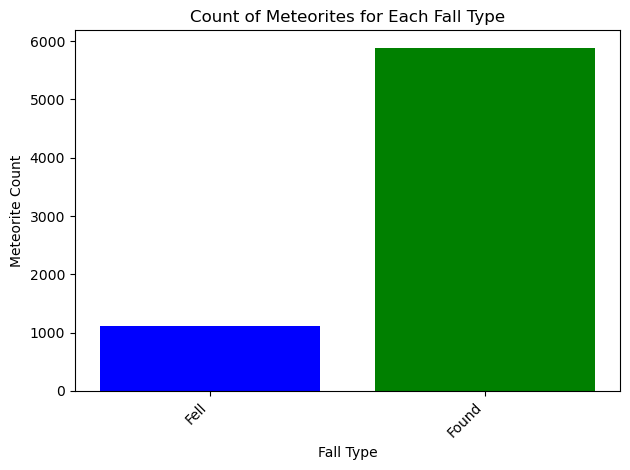

In [4]:
#Query 1 :  Provide the count of meteorites of fall

import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')
cursor = conn.cursor()

# Query to get the count of meteorites for each fall type
query = '''
    SELECT f.fall AS FallType, COUNT(*) AS MeteoriteCount
    FROM Meteorites m
    INNER JOIN Falls f ON m.fall_id = f.fall_id
    GROUP BY f.fall
'''
cursor.execute(query)
results = cursor.fetchall()
conn.close()
# Display the results
for row in results:
    print(f"Fall Type: {row[0]}, Meteorite Count: {row[1]}")
# Plotting the graph
fall_types = [row[0] for row in results]
meteorite_counts = [row[1] for row in results]
colors = ['blue', 'green']
plt.bar(fall_types, meteorite_counts, color=colors)
plt.xlabel('Fall Type')
plt.ylabel('Meteorite Count')
plt.title('Count of Meteorites for Each Fall Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
# Show the plot
plt.show()


In [14]:
#Q2: Locations With Highest Crashes
import sqlite3

conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')

#top 10 locations with the most meteorite landings
sqll_query = '''
    SELECT L.reclat, L.reclong, L.GeoLocation, COUNT(M.meteorite_id) AS meteorite_count
    FROM Locations L
    JOIN Meteorites M ON L.location_id = M.location_id
    GROUP BY L.location_id
    ORDER BY meteorite_count DESC
    LIMIT 10;
'''


cursor = conn.cursor()
cursor.execute(sqll_query)
top_locations = cursor.fetchall()

#results
print("Top 10 Locations with the Most Meteorite Landings:")
for location in top_locations:
    print(f"Latitude: {location[0]}, Longitude: {location[1]}, GeoLocation: {location[2]}, Meteorite Count: {location[3]}")


conn.close()

Top 10 Locations with the Most Meteorite Landings:
Latitude: -72.0, Longitude: 26.0, GeoLocation: (-72.0, 26.0), Meteorite Count: 1505
Latitude: -76.71667, Longitude: 159.66667, GeoLocation: (-76.71667, 159.66667), Meteorite Count: 637
Latitude: , Longitude: , GeoLocation: , Meteorite Count: 126
Latitude: 0.0, Longitude: 0.0, GeoLocation: (0.0, 0.0), Meteorite Count: 44
Latitude: -76.71667, Longitude: 159.33333, GeoLocation: (-76.71667, 159.33333), Meteorite Count: 42
Latitude: -25.23333, Longitude: -69.71667, GeoLocation: (-25.23333, -69.71667), Meteorite Count: 32
Latitude: -80.06667, Longitude: 156.38333, GeoLocation: (-80.06667, 156.38333), Meteorite Count: 27
Latitude: -24.25, Longitude: -70.51667, GeoLocation: (-24.25, -70.51667), Meteorite Count: 18
Latitude: -80.25, Longitude: 153.5, GeoLocation: (-80.25, 153.5), Meteorite Count: 15
Latitude: -30.09167, Longitude: 126.88883, GeoLocation: (-30.09167, 126.88883), Meteorite Count: 11


In [15]:
# Q3: Top 5 Meteorite types with Largest Fall Count
import sqlite3


conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')

try:
    #top 5 meteorite types with the most falls
    top_falls = '''
        SELECT CR.recclass, COUNT(M.meteorite_id) AS fall_count
        FROM Meteorites M
        JOIN Falls F ON M.fall_id = F.fall_id
        JOIN Classifications CR ON M.classification_id = CR.classification_id
        WHERE F.fall IS NOT NULL
        GROUP BY CR.recclass
        ORDER BY fall_count DESC
        LIMIT 5;
    '''


    cursor = conn.cursor()
    cursor.execute(top_falls)
    top_types_falls_count = cursor.fetchall()

    #results
    print("Top 5 Meteorite Types with the Most falls and their fall counts:")
    for meteorite_type in top_types_falls_count:
        print(f"Reclass: {meteorite_type[0]}, Fall Count: {meteorite_type[1]}")

except sqlite3.Error as e:
    print("SQLite Error:", e)

finally:

    conn.close()


Top 5 Meteorite Types with the Most falls and their fall counts:
Reclass: H5, Fall Count: 1484
Reclass: L6, Fall Count: 1298
Reclass: H4, Fall Count: 772
Reclass: H6, Fall Count: 702
Reclass: L5, Fall Count: 308


In [3]:
#Q4: List of highest and lowest meteorite-masses each year from 2001
import sqlite3
conn = sqlite3.connect('meteorite_data_normalized_5_tables.db')

try:
    mass_stats_query = '''
        SELECT year,
               MAX(mass) AS largest_mass,
               MIN(mass) AS smallest_mass,
               MAX(CASE WHEN mass = (SELECT MAX(mass) FROM Meteorites WHERE year = M.year) THEN name END) AS largest_mass_meteorite,
               MAX(CASE WHEN mass = (SELECT MIN(mass) FROM Meteorites WHERE year = M.year) THEN name END) AS smallest_mass_meteorite
        FROM Meteorites M
        WHERE year >= 2001
        GROUP BY year;
    '''

    cursor = conn.cursor()
    cursor.execute(mass_stats_query)
    mass_stats = cursor.fetchall()

    
    print("{:<10} {:<15} {:<25} {:<15} {:<25}".format("Year", "Largest Mass", "Largest Meteorite Name", "Smallest Mass", "Smallest Meteorite Name"))
    for stat in mass_stats:
        print("{:<10} {:<15} {:<25} {:<15} {:<25}".format(stat[0], stat[1], stat[3], stat[2], stat[4]))

except sqlite3.Error as e:
    print("SQLite Error:", e)

finally:
    conn.close()


Year       Largest Mass    Largest Meteorite Name    Smallest Mass   Smallest Meteorite Name  
2001       30000           Acfer 329                 0.8             Dar al Gani 1048         
2002       45300           Thuathe                   0.72            Cuddeback Dry Lake 012   
2003       44700           Cumulus Hills 04069       8.3             Cumulus Hills 04076      
2004       38000           Capot Rey                 1.47            Coyote Dry Lake 194      
2005       34200           Buck Mountains 003        13.31           Al Alamayn               
2006       3000000         Al Haggounia 001          1.08            Allan Hills 06010        
2007       100000          Chergach                  1.1             Alaer 002                
2008       110000          Sulagiri                  1.6             Cuddeback Dry Lake 013   
2009       9500            Ash Creek                 0.5             Allan Hills 09001        
2010       100000          Bou Azarif             

## Problem: Predicting Meteorite Fall Type
### --------------------------------------------------------------------------------------------------------------------------------------------------
### The objective is to create a machine learning model that, using a variety of physical characteristics and landing data, can forecast the sort of meteorite that will fall. 
- Considered: The fall column, which shows if the meteorite was seen falling (Fell) or found after impact (Found), is the target variable.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Load the original dataset kept from 
file_path = 'Meteorite_Landings.csv' # Data on over 45k meteorites that have struck Earth
df = pd.read_csv(file_path)

In [18]:
# Select relevant features and target variable
features = ['mass (g)', 'nametype', 'year', 'reclat', 'reclong']
target_variable = 'fall'

In [19]:
# Drop rows with missing values in the selected columns
df = df.dropna(subset=features + [target_variable])

In [25]:
# Encode categorical variables
df_encoded = pd.get_dummies(df[features])

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded,
    df[target_variable],
    test_size=0.20,
    random_state=42
)

# Choose a machine learning algorithm (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.9862258953168044
Confusion Matrix:
[[ 153   62]
 [  43 7365]]
Classification Report:
              precision    recall  f1-score   support

        Fell       0.78      0.71      0.74       215
       Found       0.99      0.99      0.99      7408

    accuracy                           0.99      7623
   macro avg       0.89      0.85      0.87      7623
weighted avg       0.99      0.99      0.99      7623



### Accuracy: The accuracy of the model is approximately 98.62%, indicating that it correctly predicted the fall type for a large majority of the meteorites in the test set.


## Classification Report:
### Precision: Precision measures the accuracy of positive predictions of Fall.
### Recall (Sensitivity): Recall measures the proportion of actual positives correctly predicted Fall.
### F1-Score: The weighted average of falls - precision and recall.
### Support: The number of actual occurrences of each class in the specified target variable.



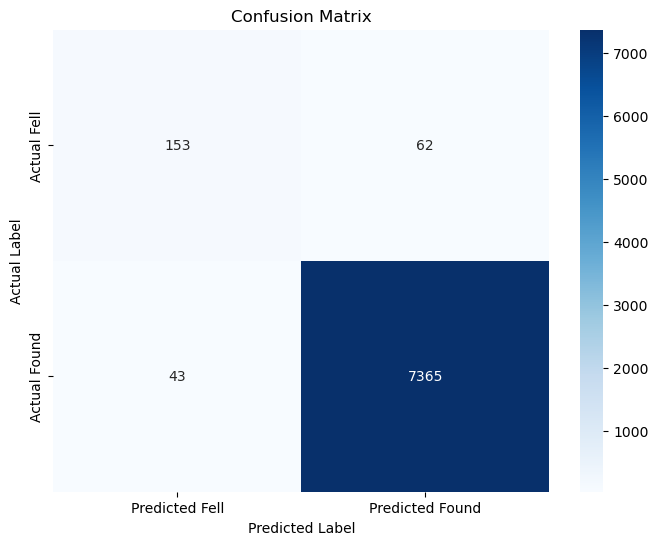

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fell', 'Predicted Found'], yticklabels=['Actual Fell', 'Actual Found'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None


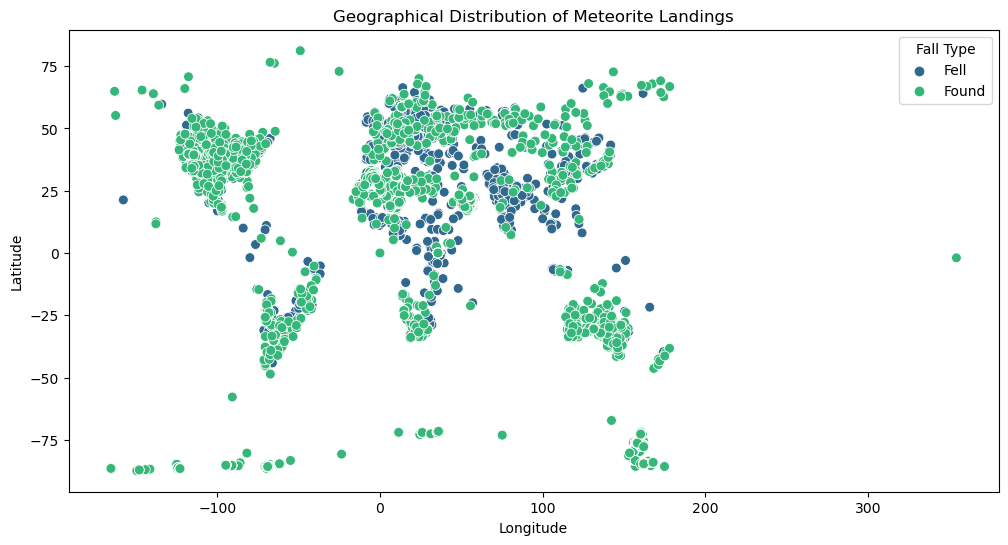

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Meteorite_Landings.csv'
meteorite_data = pd.read_csv(file_path)

print(meteorite_data.info())

plt.figure(figsize=(12, 6))
sns.scatterplot(x='reclong', y='reclat', data=meteorite_data, hue='fall', palette='viridis', marker='o', s=50)
plt.title('Geographical Distribution of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fall Type')
plt.show()

FUTURE SCOPE:
- Enhanced Prediction Models
- Geospatial Insights
- Mobile App Development
- Automation and Real-time Updates

Insights & Observations:
- The project on meteorite datasets provides valuable insights into the geographical distribution and characteristics of meteorite landings on Earth. 
- By leveraging database normalization and machine learning techniques, the project facilitates predictions of meteorite fall types. 
- The visualizations showcase the spatial patterns of landings, aiding in understanding trends and potential correlations between geographical locations and meteorite characteristics. Additionally, the project lays the groundwork for further exploration, allowing for future analysis and discoveries in the field of meteoritics.